# TS6 — Respuesta en frecuencia de Filtros Pasivos RLC

**Materia:** Análisis y Procesamiento de Señales (APS) – UNSAM 

**Docentes:** Mariano Llamedo Soria, Francisco Hernan Ledesma y David Ezequiel Benoit

**Alumnas:** Naudeau Nahiara y Gil María Serena 

**Fecha de entrega:** 26/10/2025  

---

## Objetivo

Analizar el comportamiento en frecuencia de una red **RLC pasiva**, identificando su función de transferencia y verificando que puede representarse mediante una **sección bi–cuadrática (SOS)**.  
A partir de los parámetros del circuito y de los coeficientes de partición $a$, $b$ y $d$, se busca determinar los valores característicos:

$$
\{k,\; \omega_{0z},\; Q_z,\; \omega_{0p},\; Q_p\}
$$

y estudiar la influencia de estos parámetros en la respuesta en magnitud y fase de distintas configuraciones de la red.

---

## Introducción

Los **filtros pasivos RLC** permiten modificar la amplitud y fase de una señal en función de la frecuencia, seleccionando o atenuando ciertas bandas del espectro.  
Según cómo se conecten los elementos resistivos, inductivos y capacitivos, el circuito puede comportarse como **pasa–bajos**, **pasa–altos** o **pasa–banda**.

En el análisis en el dominio de Laplace, la relación entre las tensiones de entrada y salida se expresa como:

$$
T(s) = \frac{V_2(s)}{V_1(s)}
$$

Para el circuito propuesto, dicha función adopta la forma **bi–cuadrática**:

$$
T(s) = k \cdot \frac{s^2 + \frac{\omega_{0z}}{Q_z}s + \omega_{0z}^2}{s^2 + \frac{\omega_{0p}}{Q_p}s + \omega_{0p}^2}
$$

donde:
- $k$ es la **ganancia** de continua,  
- $\omega_{0p}$ y $\omega_{0z}$ son las **frecuencias naturales** de polos y ceros,  
- y $Q_p$, $Q_z$ representan los **factores de calidad**, que determinan la selectividad y el ancho de banda del filtro.

El **ancho de banda** efectivo se relaciona directamente con el factor de calidad:

$$
BW = \frac{\omega_0}{Q}
$$

A lo largo del trabajo se buscará caracterizar experimental y teóricamente las tres funciones propuestas:

$$
T_1(s), \quad T_2(s), \quad T_3(s)
$$

analizando sus diagramas de polos y ceros, así como sus respuestas de magnitud y fase, con el objetivo de comprender cómo los parámetros del circuito afectan la forma final del filtro.

---



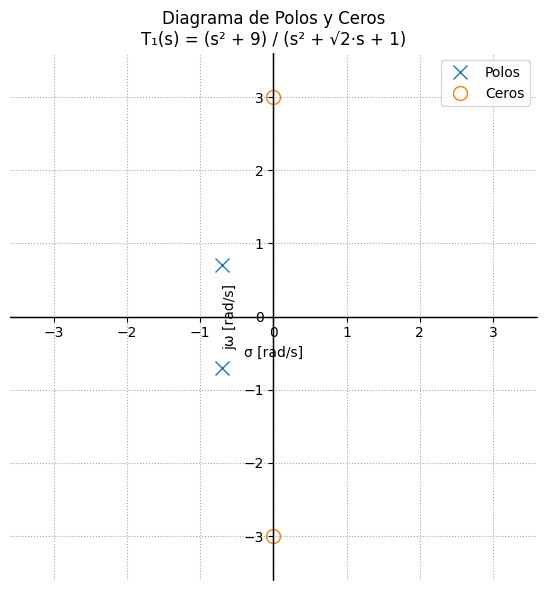

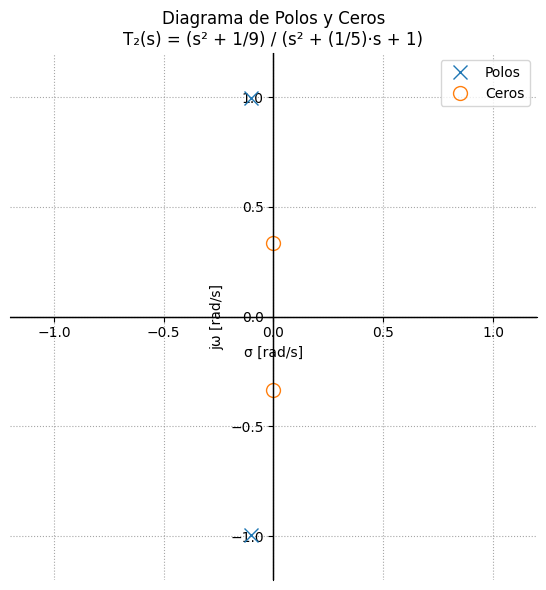

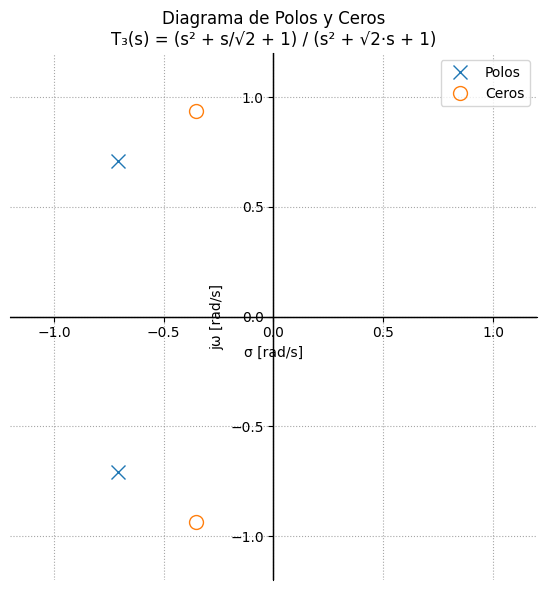

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# ====================================================
# FUNCIONES DE TRANSFERENCIA ANALÓGICAS
# ====================================================

# T1(s) = (s² + 9) / (s² + √2·s + 1)
num1 = [1, 0, 9]
den1 = [1, np.sqrt(2), 1]

# T2(s) = (s² + 1/9) / (s² + s/5 + 1)
num2 = [1, 0, 1/9]
den2 = [1, 1/5, 1]

# T3(s) = (s² + s/√2 + 1) / (s² + √2·s + 1)
num3 = [1, 1/np.sqrt(2), 1]
den3 = [1, np.sqrt(2), 1]


# ====================================================
# FUNCIÓN AUXILIAR PARA GRAFICAR POLOS Y CEROS
# ====================================================

def plot_pz(num, den, titulo):
    z, p, k = signal.tf2zpk(num, den)

    plt.figure(figsize=(6, 6))
    plt.plot(np.real(p), np.imag(p), 'x', markersize=10, label='Polos', color='tab:blue')
    if len(z) > 0:
        plt.plot(np.real(z), np.imag(z), 'o', markersize=10, fillstyle='none', color='tab:orange', label='Ceros')

    # Ejes centrados
    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Líneas guía y cuadrícula
    plt.axhline(0, color='k', lw=1)
    plt.axvline(0, color='k', lw=1)
    plt.grid(True, which='both', ls=':', color='gray', alpha=0.7)

    # Márgenes automáticos y aspecto proporcional
    all_points = np.concatenate((p, z)) if len(z) > 0 else p
    max_r = np.max(np.abs(all_points)) * 1.2
    plt.xlim(-max_r, max_r)
    plt.ylim(-max_r, max_r)
    plt.gca().set_aspect('equal', adjustable='box')

    # Etiquetas
    plt.title(f"Diagrama de Polos y Ceros\n{titulo}")
    plt.xlabel('σ [rad/s]')
    plt.ylabel('jω [rad/s]')
    plt.legend()
    plt.tight_layout()
    plt.show()


# ====================================================
# GRAFICAR LOS TRES DIAGRAMAS
# ====================================================

plot_pz(num1, den1, "T₁(s) = (s² + 9) / (s² + √2·s + 1)")
plot_pz(num2, den2, "T₂(s) = (s² + 1/9) / (s² + (1/5)·s + 1)")
plot_pz(num3, den3, "T₃(s) = (s² + s/√2 + 1) / (s² + √2·s + 1)")


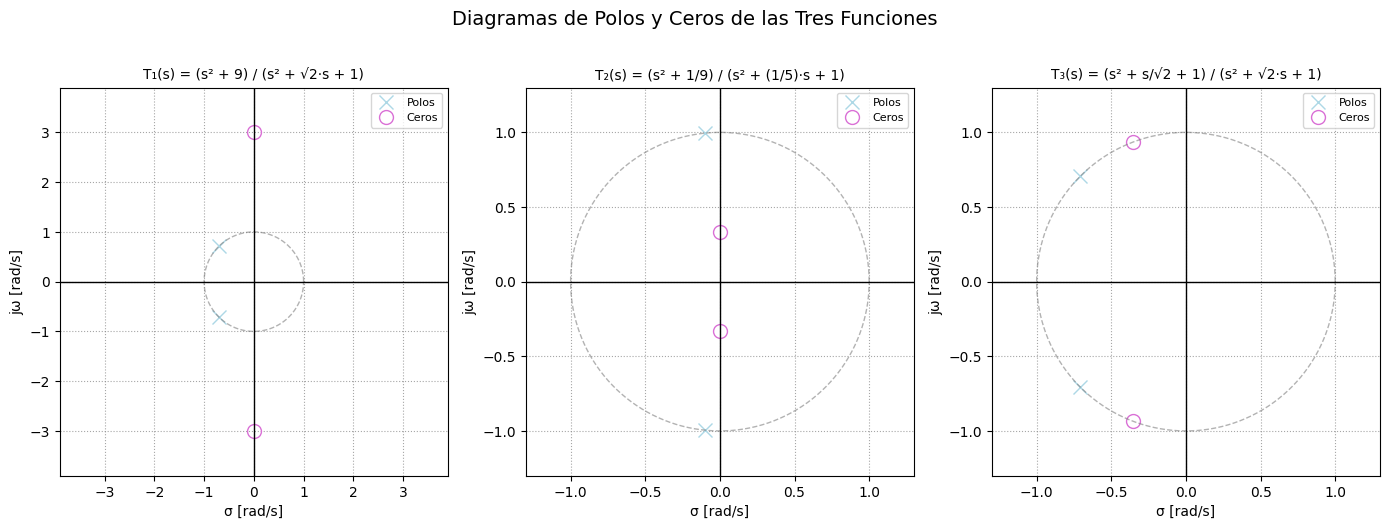

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Funciones de transferencia analógicas

# T1(s) = (s² + 9) / (s² + √2·s + 1)
num1 = [1, 0, 9]
den1 = [1, np.sqrt(2), 1]

# T2(s) = (s² + 1/9) / (s² + s/5 + 1)
num2 = [1, 0, 1/9]
den2 = [1, 1/5, 1]

# T3(s) = (s² + s/√2 + 1) / (s² + √2·s + 1)
num3 = [1, 1/np.sqrt(2), 1]
den3 = [1, np.sqrt(2), 1]

# Subplots

fig, axs = plt.subplots(1, 3, figsize=(14, 5))
funciones = [
    (num1, den1, "T₁(s) = (s² + 9) / (s² + √2·s + 1)"),
    (num2, den2, "T₂(s) = (s² + 1/9) / (s² + (1/5)·s + 1)"),
    (num3, den3, "T₃(s) = (s² + s/√2 + 1) / (s² + √2·s + 1)")
]

for ax, (num, den, titulo) in zip(axs, funciones):
    # Cálculo de polos y ceros
    z, p, k = signal.tf2zpk(num, den)

    # --- Polos y ceros ---
    ax.plot(np.real(p), np.imag(p), 'x', color='lightblue', markersize=10, label='Polos')
    ax.plot(np.real(z), np.imag(z), 'o', color='orchid', markersize=10, fillstyle='none', label='Ceros')

    # --- Circunferencia guía (radio = 1) ---
    theta = np.linspace(0, 2*np.pi, 300)
    ax.plot(np.cos(theta), np.sin(theta), color='gray', ls='--', lw=1, alpha=0.6)

    # --- Ejes centrados ---
    ax.axhline(0, color='k', lw=1)
    ax.axvline(0, color='k', lw=1)

    # --- Estilo ---
    ax.set_title(titulo, fontsize=10)
    ax.set_xlabel('σ [rad/s]')
    ax.set_ylabel('jω [rad/s]')
    ax.grid(True, which='both', ls=':', color='gray', alpha=0.7)
    ax.legend(loc='upper right', fontsize=8)

    # Escala automática y aspecto cuadrado
    all_points = np.concatenate((p, z)) if len(z) > 0 else p
    max_r = np.max(np.abs(all_points)) * 1.3
    ax.set_xlim(-max_r, max_r)
    ax.set_ylim(-max_r, max_r)
    ax.set_aspect('equal', adjustable='box')

plt.suptitle("Diagramas de Polos y Ceros de las Tres Funciones", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()
